# Nerdy Personality Classification

**Task (T)**: Classify a respondent as ever diagnosed with Autism or not.  
**Experience (E)**: A corpus of survey responses where some respondents indicated a prior diagnosis of Autism.  
**Performance (P)**: Area Under ROC Curve (AUC), corresponding to the accuracy rates of classification

In [68]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style("ticks")

In [5]:
raw_df = pd.read_csv("NPAS-data/NPAS-data.csv")
df = raw_df.copy()

In [6]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,voted,married,familysize,race+AF8-arab,race+AF8-asian,race+AF8-black,race+AF8-white,race+AF8-hispanic,race+AF8-nativeam,race+AF8-nativeau,race+AF8-other,nerdy,ASD
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,3.836389,3.961213,4.112835,3.661495,3.853315,3.705219,4.153032,3.695346,3.942172,4.103667,3.017630,3.815233,3.640339,3.669252,2.842031,3.372355,3.819464,3.915374,3.311707,3.622003,2.850494,2.390691,3.834274,4.242595,3.174894,4.110719,690.766573,418.625529,632.263752,3.444288,4.198872,4.997884,4.465444,5.562764,5.183357,5.011283,4.021862,4.385049,2.557828,0.968970,0.925247,0.559944,0.973202,0.949224,0.114951,0.307475,0.448519,0.053597,0.965444,0.307475,0.198166,0.792666,0.909732,0.967560,0.981664,2.393512,2.133286,1.673484,1.260226,53.986601,1223.253879,833.155148,1.174189,4.227786,1.723554,1.715092,1.237659,2.598025,0.015515,0.151622,0.045134,0.775035,0.078984,0.035261,0.002116,0.055712,5.356841,1.927362
std,1.161012,1.253609,1.075140,1.267229,1.184911,1.168506,1.101033,1.383538,1.107891,1.057874,1.579812,1.221309,1.299414,1.182643,1.501497,1.419045,1.170619,1.345644,1.586870,1.165668,1.619898,1.361212,1.383963,0.968286,1.399825,1.084183,9639.304012,8344.602861,9949.035590,1.939468,1.854997,1.701217,1.963824,1.416934,1.699003,1.699313,1.955814,1.849634,1.627602,0.173459,0.263085,0.496569,0.161550,0.219617,0.319075,0.461611,0.497518,0.225299,0.182716,0.461611,0.398759,0.405540,0.286666,0.177228,0.134209,0.965320,0.723538,0.560914,0.442116,1030.333496,520.391033,186.522902,0.494126,3.564055,1.234540,0.460812,0.530581,1.509059,0.123632,0.358781,0.207671,0.417706,0.269810,0.184504,0.045964,0.229446,1.448587,0.290424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,4.000000,2.000000,4.000000,4.000000,81.000000,118.000000,2.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.00

# Transform data

In [7]:
# Oversample

asd_df = df[df['ASD']==1]
#asd_df.take(np.random.permutation(len(asd_df))[:80])

### Calculate Test Scores

In [8]:

def score_npas(df):
    '''Adds up responses to the NPAS questions'''
    npas_columns = ['Q{}'.format(i) for i in range(1,27)]
    df['NPAS_score'] = df[npas_columns].sum(axis=1)
    
    return df

scored = score_npas(df)
scored.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,voted,married,familysize,major,race+AF8-arab,race+AF8-asian,race+AF8-black,race+AF8-white,race+AF8-hispanic,race+AF8-nativeam,race+AF8-nativeau,race+AF8-other,nerdy,ASD,NPAS_score
0,5,5,4,5,4,5,5,2,5,5,5,4,4,4,4,1,4,5,4,5,5,5,5,5,2,5,17,113,209,2,1,6,6,7,6,2,7,3,2,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,2,2,3,1,19,320,480,2,2,3,2,1,2,chemistry,0,0,0,1,0,0,0,0,7,1,112
1,4,4,4,4,4,4,3,5,5,4,5,3,5,4,4,4,5,5,5,4,4,4,4,4,3,5,102,69,125,6,6,7,3,6,5,5,2,5,3,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,4,2,1,1,42,1600,900,1,4,1,2,2,3,english,0,0,0,1,0,0,0,0,6,2,109
2,4,3,4,4,5,4,4,4,5,5,1,4,5,4,3,4,4,5,2,5,4,4,5,5,5,5,1,94,126,2,5,5,5,6,5,5,5,3,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,4,2,3,1,60,1440,900,1,1,5,2,3,6,english,0,0,0,1,0,0,0,0,6,2,107
3,4,1,5,4,3,5,4,4,2,5,5,3,3,4,4,5,5,2,5,2,1,1,1,5,5,4,18,1987,630,2,2,6,6,2,6,5,1,3,4,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,2,1,17,1536,864,1,2,1,2,1,2,Game design,0,0,0,1,0,0,0,0,6,2,92
4,4,3,5,5,5,5,4,5,0,4,1,4,4,4,2,5,4,5,1,4,2,4,5,4,2,5,19,137,245,1,5,5,6,6,6,3,6,3,2,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,4,3,2,1,52,1280,800,1,2,2,1,1,3,experimental psychology,0,0,0,1,0,0,0,0,6,2,96


In [9]:
def score_tipi(df):
    ''' 
    Computes Big 5 personality scores based on ten item TIPI test. Drops raw columns after calculations.
    
    Scoring (“R” denotes reverse-scored items):
        Extraversion: 1, 6R; Agreeableness: 2R, 7; 
        Conscientiousness; 3, 8R; Emotional Stability: 4R, 9; 
        Openness to Experiences: 5, 10R. 
    
    '''
    
    df['extraversion'] = (df['TIPI1'] + (8-df['TIPI6'])) / 2
    df['agreeableness'] = (df['TIPI7'] + (8- df['TIPI2'])) / 2
    df['conscientiousness'] = (df['TIPI3'] + (8- df['TIPI8'])) / 2
    df['neuroticism'] = (df['TIPI9'] + (8- df['TIPI4'])) / 2
    df['openness'] = (df['TIPI5'] + (8- df['TIPI10'])) / 2
    
    df.drop(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7','TIPI8','TIPI9', 'TIPI10'], axis=1, inplace=True)
    
    return df
    
df = score_tipi(df)
#df.head()

In [10]:
def mark_fakers(df):
    '''
    Gives people who said they knew all the fake words a class of VCL_faker. 
    VCL6, VCL9, VCL12 are fake words.
    '''
    
    df.loc[ (df['VCL6'] == 1) & (df['VCL9'] == 1) & (df['VCL12'] == 1), 'VCL_faker' ] = 1
    
    return df

def score_vocab(df):
    '''Adds up correct answers on real words.'''
    
    df['Vocab_Score'] = (df['VCL1'] + df['VCL2'] + df['VCL3'] + df['VCL4'] + df['VCL5'] + df['VCL7']
                         + df['VCL8'] + df['VCL10'] + df['VCL11'] + df['VCL13'] + df['VCL14']
                         + df['VCL15'] + df['VCL16'] )
    
    # Corrects for fakers by assigning them the average score
    df.loc[ (df['VCL_faker'] == 1), 'Vocab_Score'] = int(np.mean(df['Vocab_Score']))
    
    return df

df = mark_fakers(df)
df = score_vocab(df)
#df.head()

### Make some binary classes

In [11]:
# Only Child
df.loc[df['familysize']==1, 'only_child'] = int(1)
df.loc[df['familysize']!=1, 'only_child'] = int(0)
df['only_child'].value_counts()

0.0    1192
1.0    226 
Name: only_child, dtype: int64

1.0    767
0.0    651
Name: nerd_champion, dtype: int64

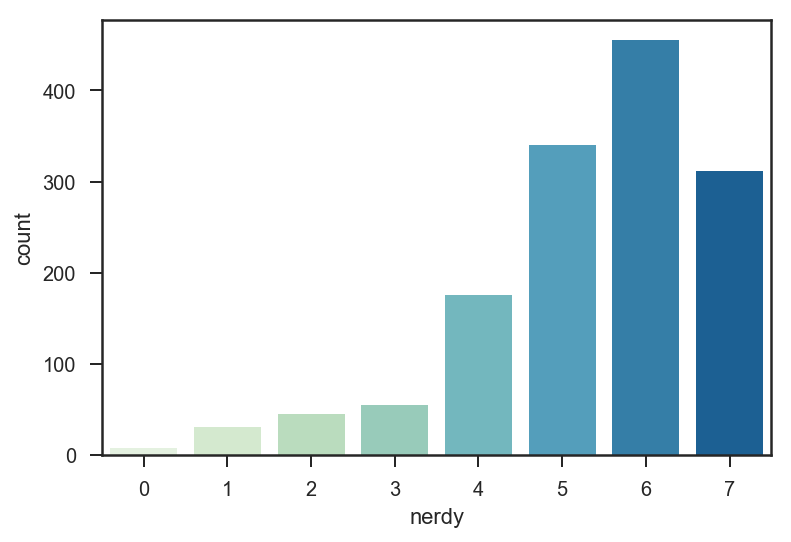

In [69]:
df.loc[(df['nerdy']==7) | (df['nerdy']==6), 'nerd_champion'] = int(1)
df.loc[(df['nerdy']!=7) & (df['nerdy']!=6), 'nerd_champion'] = int(0)

sns.countplot(df['nerdy'], palette=sns.color_palette("GnBu", 8))
df['nerd_champion'].value_counts()

In [13]:
df.loc[df['religion']==2, 'atheist'] = int(1)
df.loc[df['religion']!=2, 'atheist'] = int(0)
df['atheist'].value_counts()

0.0    1035
1.0    383 
Name: atheist, dtype: int64

In [14]:
df.loc[df['ASD'] == 2, 'ASD'] = 0 # "2" --> "0" means no ASD
df['ASD'].value_counts()

0    1339
1    79  
Name: ASD, dtype: int64

In [15]:
# dummies = pd.get_dummies(data=df, columns=['gender','religion'])
# df = pd.concat([df, dummies])
# #df.drop(all_demographics, axis=1, inplace=True)
# df.head()

In [16]:
transformed_df = df.copy()

# Exploratory Data Analysis

In [17]:
#df.apply(pd.Series.value_counts)

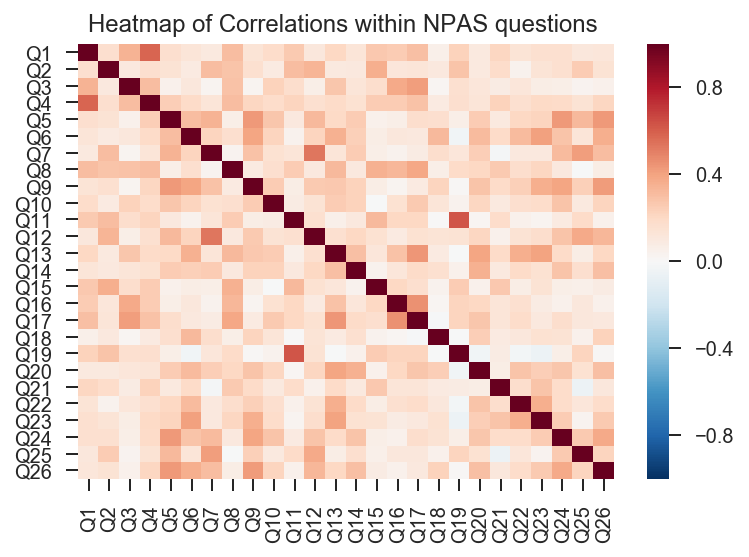

In [185]:
sns.heatmap(transformed_df[npas_columns].corr(), annot=False)
plt.title("Heatmap of Correlations within NPAS questions ")

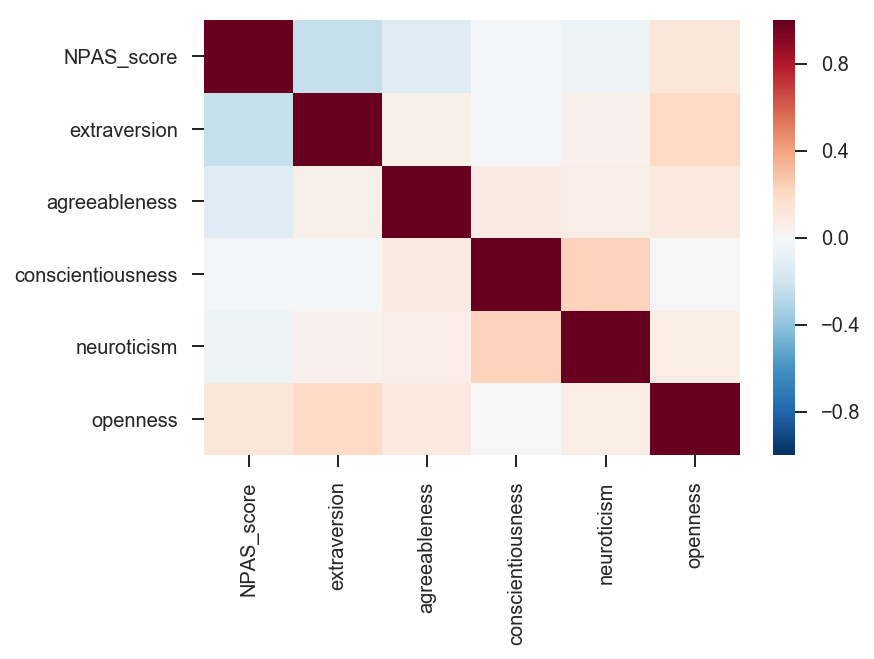

In [142]:
sns.heatmap(transformed_df[npas_score+personality_columns].corr(), annot=False)

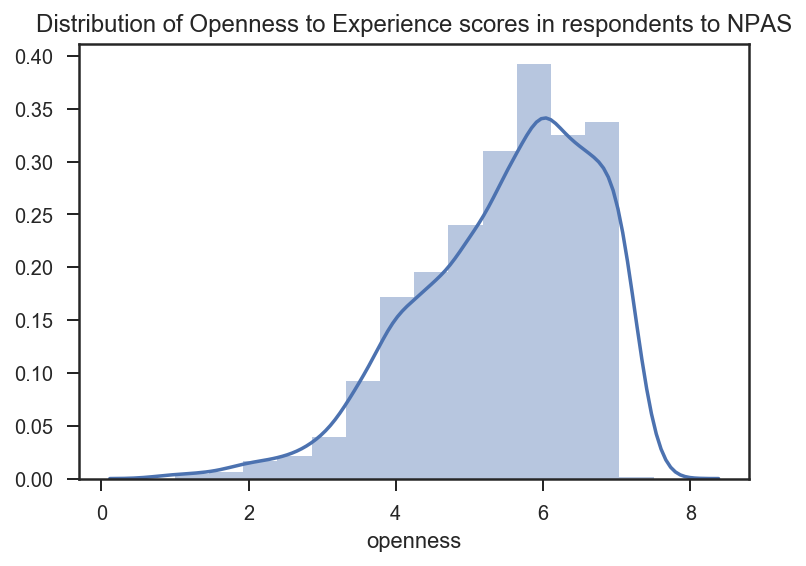

In [162]:
from scipy.stats import norm

sns.distplot(df['openness'], bins=14, hist_kws={ "linewidth": 3,
                           "alpha": .4} )
plt.title("Distribution of Openness to Experience scores in respondents to NPAS")

### Nerd Champions

In [20]:
#sns.countplot(df['familysize'], hue=df['nerd_champion'])

### Autism Spectrum

In [182]:
len(df[df['ASD']==1])/ len(df['ASD'])

0.05571227080394922

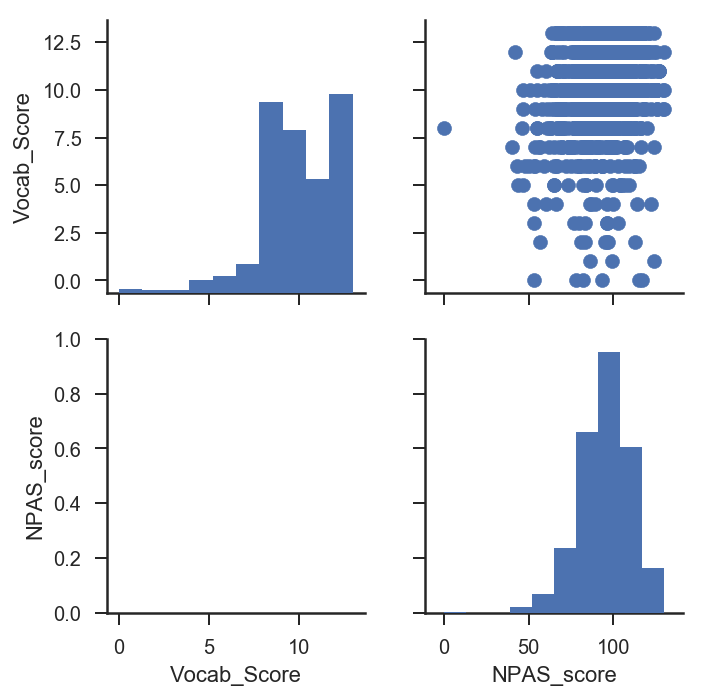

In [178]:
# Map to upper,lower, and diagonal

pg = sns.PairGrid(transformed_df[['Vocab_Score','NPAS_score']])
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter)
#pg.map_lower(sns.kdeplot)

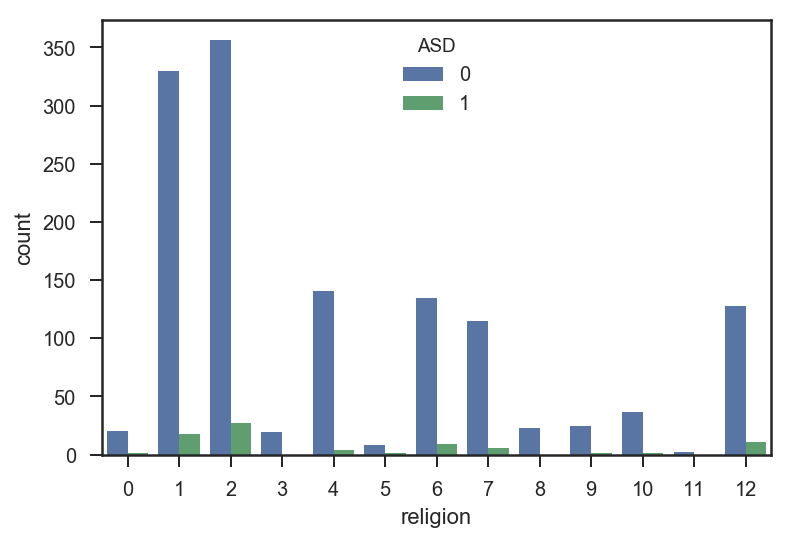

In [70]:
sns.countplot(df['religion'], hue=df['ASD'])

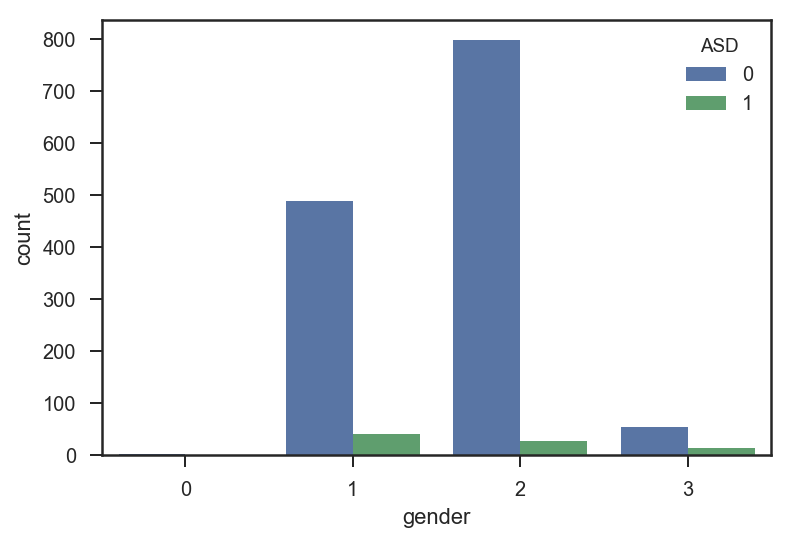

In [189]:
sns.countplot(df['gender'], hue=df['ASD'],)
### ASK HOW TO VISUALIZE TWO DISTRIBUTIONS (KDEs) ON COMPARABLE SCALE

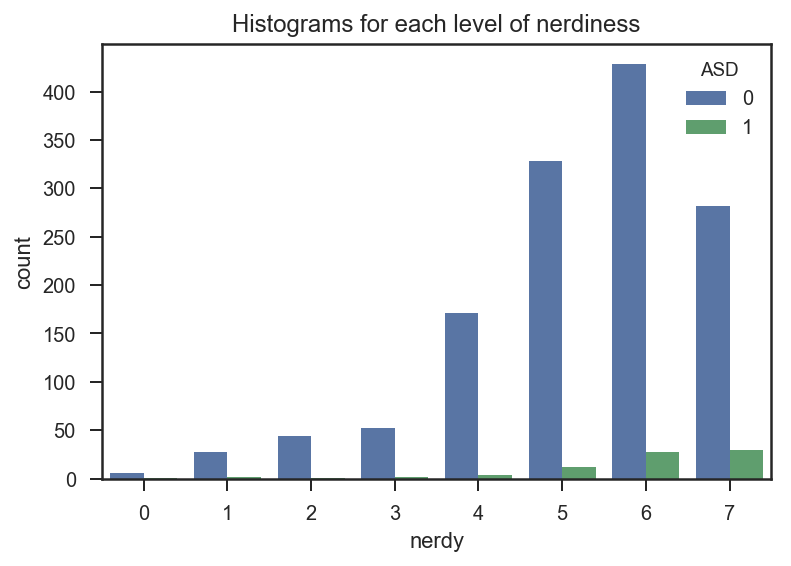

In [200]:
sns.countplot(df['nerdy'], hue=df['ASD'])
plt.title("Histograms for each level of nerdiness")

# Classification Models

## Pipeline Construction

In [23]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
import sklearn.preprocessing as preprocessing
from sklearn import decomposition
from sklearn import feature_selection
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, classification_report
import ml_insights as mli

In [24]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

def cross_val_predict_proba(model, X, y, folds=5, verbose=True):
    this_model = clone(model)
    num_classes = len(np.unique(y))
    y_pred = np.zeros((len(y),num_classes))
    skf = StratifiedKFold(n_splits=folds, shuffle=True).split(X, y)
    for idx, (train_idx, test_idx) in enumerate(skf):
        if verbose:
            print("training fold {} of {}".format(idx+1, folds))
        X_train = np.array(X)[train_idx,:]
        X_test = np.array(X)[test_idx,:]
        y_train = np.array(y)[train_idx]
        # We could also copy the model first and then fit it
        
        this_model.fit(X_train,y_train)
        y_pred[test_idx,:] = this_model.predict_proba(X_test)
    return y_pred

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
class IdentityTransform(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X
    
class SelectColsTransform(BaseEstimator, TransformerMixin):
    '''Returns specified columns'''

    def __init__(self, X, cols):
        self.X = X
        self.cols = cols
        self.col_idxs = [self.X.columns.get_loc(col) for col in cols]
    
    def fit(self, x, y=None):
        return self

    def transform(self, X):
        if type(X) == np.ndarray:
            return X[:,self.col_idxs]
        else:
            return X[self.cols]
    
    def get_feature_names(self):
        return self.cols
    

### Feature Sets

In [26]:
### Feature Sets ###

# NPAS questions Q1 - Q26
npas_columns = ['Q{}'.format(i) for i in range(1,27)]
npas_score = ['NPAS_score']

# Scored TIPI test personality results
personality_columns = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness']

# Vocab test results
vocab_score = ['Vocab_Score']
vocab_fakers = ['VCL_faker']

# Nerdiness
all_nerd_columns = ['nerdy', 'nerd_champion']
nerdy = ['nerdy']

# Demographics
all_demographics = ['education', 'urban', 'gender', 'engnat', 'age', 'hand',
                    'religion', 'orientation', 'voted', 'married', 'familysize']
demographics_quant = []
only_child = ['only_child']
atheist = ['atheist']
base_demographics =['gender', 'age']

## Eval Base Models pipeline function

In [84]:
def eval_base_models(df, target, predictors, models, grid_params={}):

    ### SET PREDICTOR VARIABLES ###
    chosen_predictors = predictors

    ### SELECT MODELS ###
    models = models

    ### SPECIFY MODEL PARAMETERS ###
    grid_params = grid_params

    #Separates target from rest of data
    y = df[target]
    X = df.drop([target], axis=1)

    #Prepare graph for ROC results for each model
    plt.figure(figsize=(8,12))#, dpi=120)
    roc_plot = plt.subplot(211)
    roc_plot.set_title("ROC Curves for {}".format(target))
    roc_plot.set_xlabel("FPR")
    roc_plot.set_ylabel("TPR")
    roc_plot.plot([0,1],[0,1], 'r--', label='chance')

    #Prepare graph for Precision-Recall Curve
    pr_plot = plt.subplot(212)
    pr_plot.set_title("Precision-Recall Curves for {}".format(target))
    pr_plot.set_xlabel("Recall")
    pr_plot.set_ylabel("Precision")

    # Begin Pipeline
    for model in models:

        # FEATURES
        features = []
        features.append(('predictors', SelectColsTransform(X, chosen_predictors)))
        feature_union = FeatureUnion(features)

        # ESTIMATORS
        estimators = []
        estimators.append(('features', feature_union))
        estimators.append(('model', eval(model)))

        pipe = Pipeline(estimators)

        model = pipe.named_steps['model']
        print(model)
        features = pipe.named_steps['features']
        #print(features)

        # EVALUATION   
        y_pred_prob_mat = cross_val_predict_proba(pipe, X, y, verbose=False)
        y_pred_prob = y_pred_prob_mat[:,1]

        auc = roc_auc_score(y, y_pred_prob)
        print("AUC:", auc)

        fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

        #Graph ROC for this model
        roc_plot.plot(fpr, tpr, label='{}:{}'.format(str(model)[:9], str(auc)[:6]))
        roc_plot.legend()

        precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
        pr_plot.plot(recall, precision, label='{}'.format(str(model)[:9]))
        pr_plot.legend()
    return #pipe

## Baseline Models

### Predicting Nerd Champions

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC: 0.791743521651
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
AUC: 0.746388566782
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
      

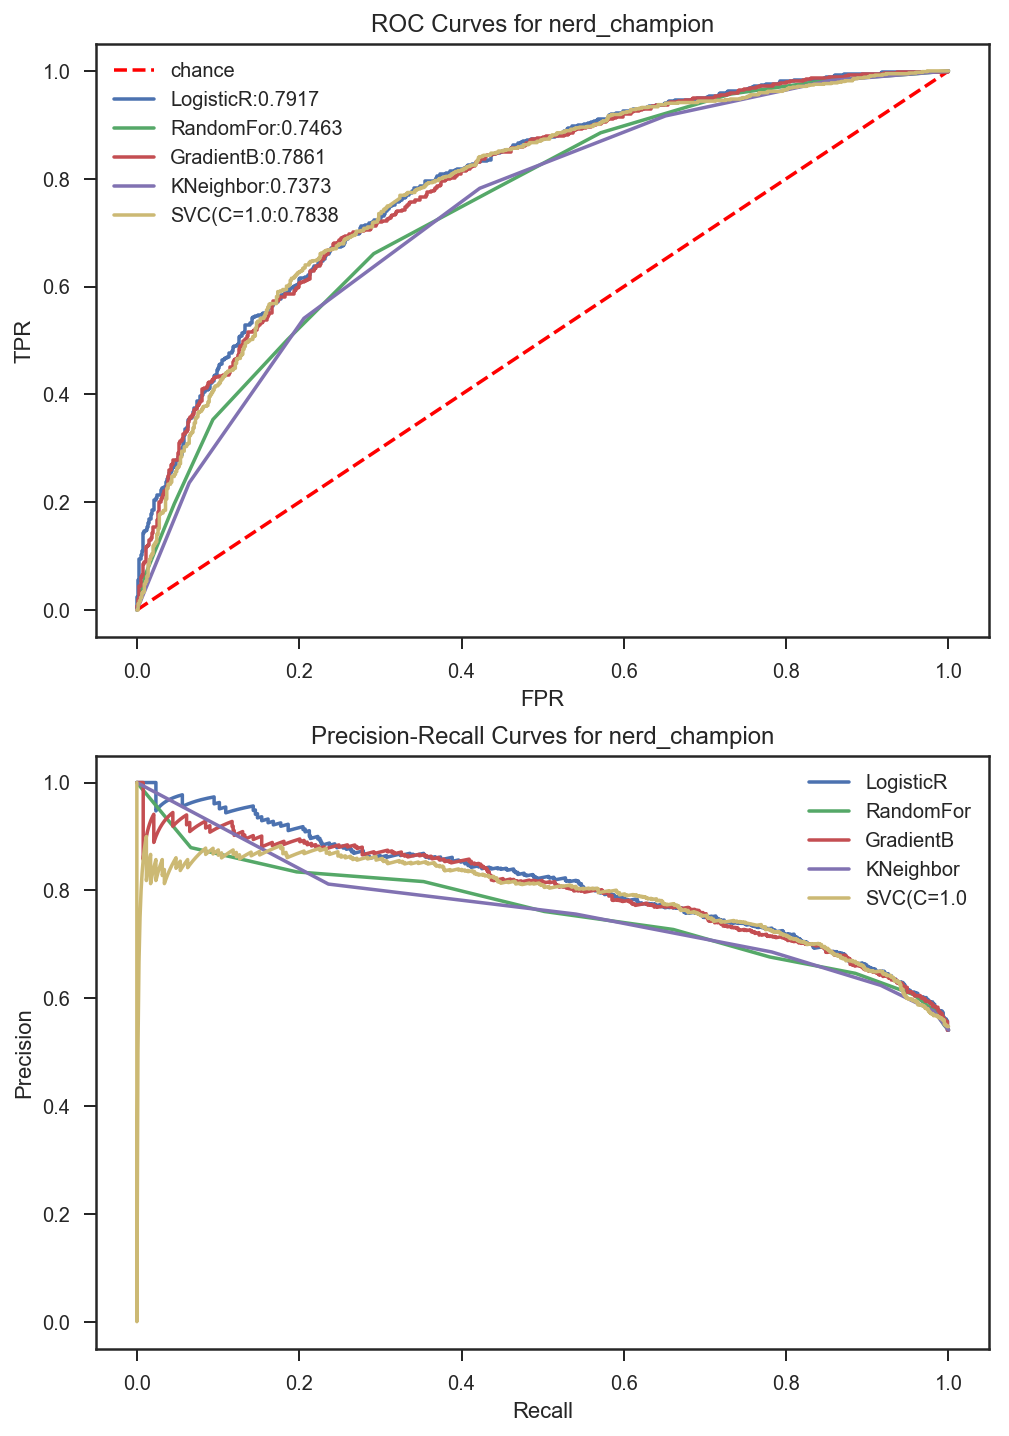

In [85]:
### SET TARGET COLUMN###
target = 'nerd_champion'

### SET PREDICTOR VARIABLES ###
chosen_predictors = npas_columns + personality_columns 

### SELECT MODELS ###
models = ['LogisticRegression()', 'RandomForestClassifier()',
             'GradientBoostingClassifier()', 'KNeighborsClassifier()', 'SVC(probability=True)']

eval_base_models(transformed_df, target, chosen_predictors, models)

#### Visualize Decision Tree

In [29]:
import subprocess
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [30]:
# y = df[target]
# X = df[personality_columns]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# tree = DecisionTreeClassifier()
# tree.fit(X_train, y_train)
# y_pred = tree.predict(X_test)

# #classification_report(y_test, y_pred)

# visualize_tree(tree, personality_columns)

#### Nerd Champion feature importances

In [31]:
from pprint import pprint
gbm_model = GradientBoostingClassifier()

target = 'nerd_champion'
#Separates target from rest of data
y = transformed_df[target]
X = transformed_df.drop([target], axis=1)
X = X[npas_columns+npas_score+personality_columns+all_demographics]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbm_model.fit(X_train, y_train)
pprint(list(zip(X.columns, gbm_model.feature_importances_)))
# y_pred_prob_mat = cross_val_predict_proba(gbm_model, X, y, verbose=False)
# y_pred_prob = y_pred_prob_mat[:,1]

[('Q1', 0.013116996479856065),
 ('Q2', 0.01428667413101437),
 ('Q3', 0.010922660938878637),
 ('Q4', 0.016407661138309538),
 ('Q5', 0.0043931325094240499),
 ('Q6', 0.023951454393928668),
 ('Q7', 0.0080672237384443821),
 ('Q8', 0.0095508778272334668),
 ('Q9', 0.026248282919681322),
 ('Q10', 0.0072847520107858291),
 ('Q11', 0.016905499990144717),
 ('Q12', 0.019258136367747685),
 ('Q13', 0.024035424820967127),
 ('Q14', 0.020404830859825345),
 ('Q15', 0.014123332147304737),
 ('Q16', 0.026453292582144922),
 ('Q17', 0.0078704551257324836),
 ('Q18', 0.013732640300448103),
 ('Q19', 0.027444408365453494),
 ('Q20', 0.0061052842033443586),
 ('Q21', 0.03212058899326882),
 ('Q22', 0.0083768404473123278),
 ('Q23', 0.021225577054677626),
 ('Q24', 0.020751312561897387),
 ('Q25', 0.025675373587833575),
 ('Q26', 0.018313211009762131),
 ('NPAS_score', 0.1836449915545986),
 ('extraversion', 0.02650958421094976),
 ('agreeableness', 0.051615580466542299),
 ('conscientiousness', 0.042912128573207725),
 ('neur

#### ASD feature importances

In [32]:
from pprint import pprint
gbm_model = GradientBoostingClassifier()

target = 'ASD'
#Separates target from rest of data
y = transformed_df[target]
X = transformed_df.drop([target], axis=1)
X = X[npas_columns+npas_score+personality_columns+all_demographics]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbm_model.fit(X_train, y_train)
pprint(list(zip(X.columns, gbm_model.feature_importances_)))
# y_pred_prob_mat = cross_val_predict_proba(gbm_model, X, y, verbose=False)
# y_pred_prob = y_pred_prob_mat[:,1]

[('Q1', 0.0027431993753646577),
 ('Q2', 0.019470242414076976),
 ('Q3', 0.010829003377259696),
 ('Q4', 0.013738578281663125),
 ('Q5', 0.0114942031447158),
 ('Q6', 0.017045082225513902),
 ('Q7', 0.0033571244225140211),
 ('Q8', 0.026350709893130441),
 ('Q9', 0.026334063641718242),
 ('Q10', 0.030373562187679934),
 ('Q11', 0.010965446801827873),
 ('Q12', 0.012252419548505509),
 ('Q13', 0.01465848558698914),
 ('Q14', 0.016798663788358623),
 ('Q15', 0.021582932146547242),
 ('Q16', 0.019254660351715528),
 ('Q17', 0.0011667129354161964),
 ('Q18', 0.010917101433791989),
 ('Q19', 0.0032984361454734528),
 ('Q20', 0.0097159975648920642),
 ('Q21', 0.016260418025855476),
 ('Q22', 0.011528068171610076),
 ('Q23', 0.0025204370730223034),
 ('Q24', 0.00049471257281480689),
 ('Q25', 0.015568700611983318),
 ('Q26', 0.0012794134095858274),
 ('NPAS_score', 0.19806744807321508),
 ('extraversion', 0.014670279096279781),
 ('agreeableness', 0.040088681961251288),
 ('conscientiousness', 0.058051362935774883),
 ('n

### Predicting ASD with Base Models

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC: 0.644340666093
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
AUC: 0.60873408268
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
      

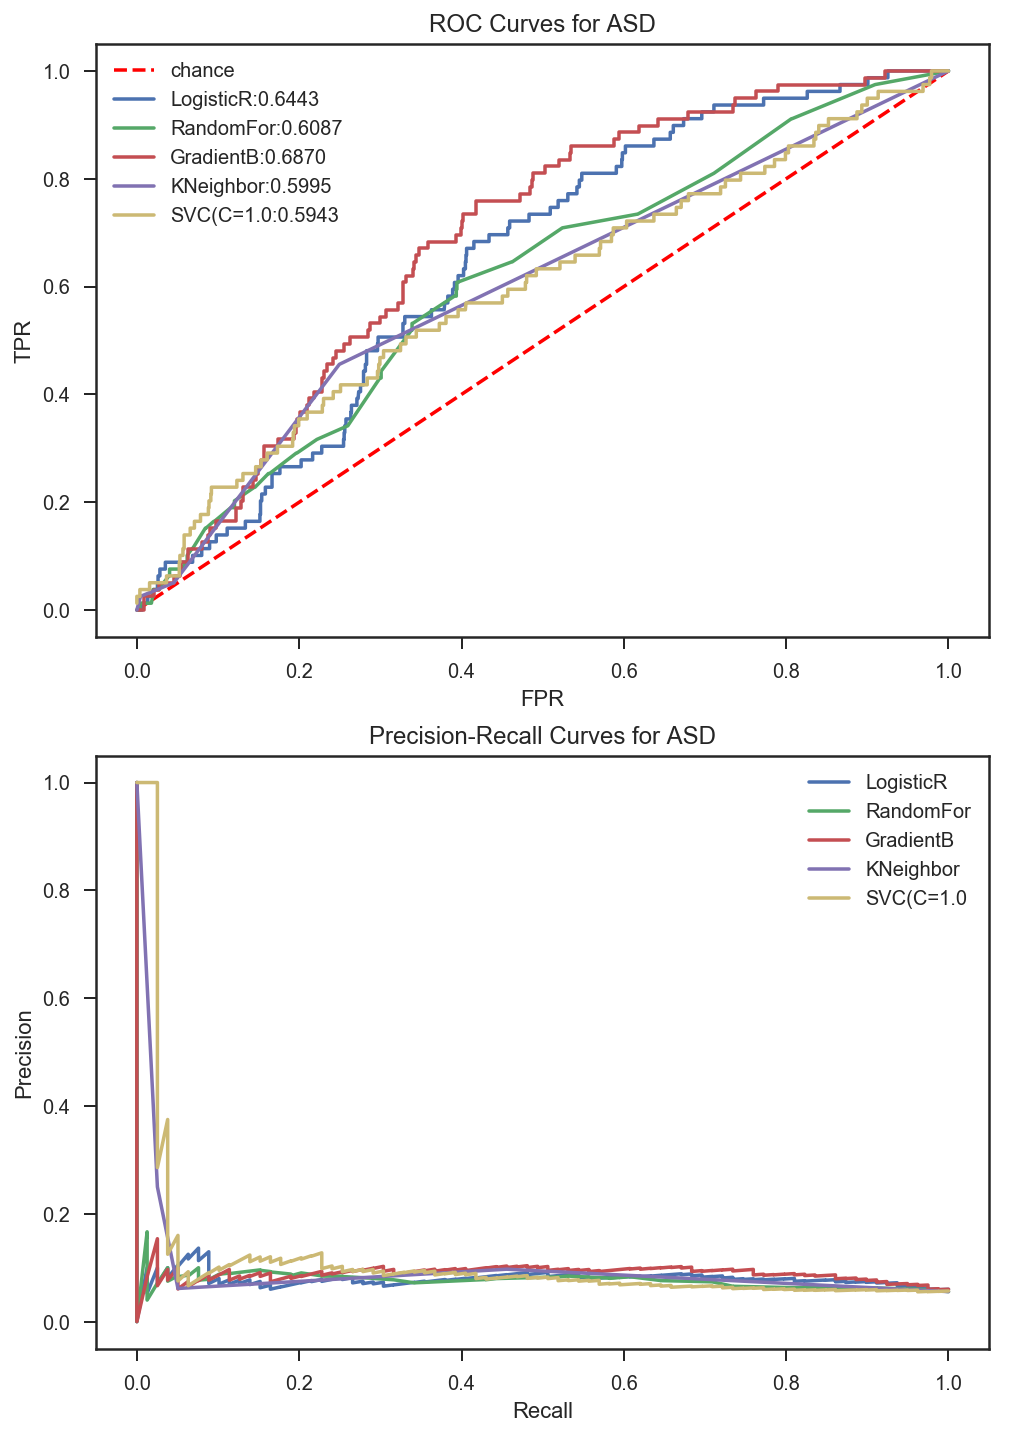

In [79]:
### SET TARGET COLUMN###
target = 'ASD'

### SET PREDICTOR VARIABLES ###
#chosen_predictors = all_demographics
#chosen_predictors = npas_columns + all_demographics + personality_columns
chosen_predictors = npas_columns

### SELECT MODELS ###
models = ['LogisticRegression()', 'RandomForestClassifier(n_estimators=500)',
             'GradientBoostingClassifier()', 'KNeighborsClassifier()', 'SVC(probability=True)']

eval_base_models(transformed_df, target, chosen_predictors, models)

## Advanced Models

In [88]:
def eval_model(df, target, predictors, model, grid_params={}):

    ### SET PREDICTOR VARIABLES ###
    chosen_predictors = predictors

    ### SPECIFY MODEL PARAMETERS ###
    grid_params = grid_params

    # Upsamples target minority class (need to make this apply to only training sets)
    # df = upsample(df, target)
    
    # Separates target from rest of data
    y = df[target]
    X = df.drop([target], axis=1)
    X = X[predictors]

    #Prepare graph for ROC results for each model
    plt.figure(figsize=(8,12))
    roc_plot = plt.subplot(211)
    roc_plot.set_title("ROC Curve for {}".format(target))
    roc_plot.set_xlabel("False Pos. Rate")
    roc_plot.set_ylabel("True Pos. Rate")
    roc_plot.plot([0,1],[0,1], 'r--', label='chance')

    #Prepare graph for Precision-Recall Curve
    pr_plot = plt.subplot(212)
    pr_plot.set_title("Precision-Recall Curve for {}".format(target))
    pr_plot.set_xlabel("Recall")
    pr_plot.set_ylabel("Precision")

    #### FEATURES
    features = []
    features.append(('predictors', SelectColsTransform(X, chosen_predictors)))
    features.append(('pca', decomposition.PCA(n_components=2)))
    feature_union = FeatureUnion(features)
    
    #features.append(('poly', preprocessing.PolynomialFeatures(degree=2)))
    #features.append(('kbest', feature_selection.SelectKBest(k=10)))
    

    #### ESTIMATORS
    estimators = []
    estimators.append(('features', feature_union))
    estimators.append(('scaler', preprocessing.StandardScaler()))
    estimators.append(('model', model))

    pipe = Pipeline(estimators)

    model = pipe.named_steps['model']
    print(model)

    #### EVALUATION
    estimator = pipe
    estimator.fit(X, y)

    y_pred_prob_mat = cross_val_predict_proba(estimator, X, y, verbose=False)
    y_pred_prob = y_pred_prob_mat[:,1]

    auc = roc_auc_score(y, y_pred_prob)
    print("AUC:", auc)

    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

    #Graph ROC for this model
    roc_plot.plot(fpr, tpr, label='{}:{}'.format(str(model)[:9], str(auc)[:6]))
    roc_plot.legend()

    precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)
    pr_plot.plot(recall, precision, label='{}'.format(str(model)[:9]))
    pr_plot.legend()
    return estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC: 0.803693845793


Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('predictors', SelectColsTransform(X=      Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  \
0     5   5   4   5   4   5   5   2   5   5    5    4    4    4    4    1
1     4   4   4   4   4   4   3   5   5   ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

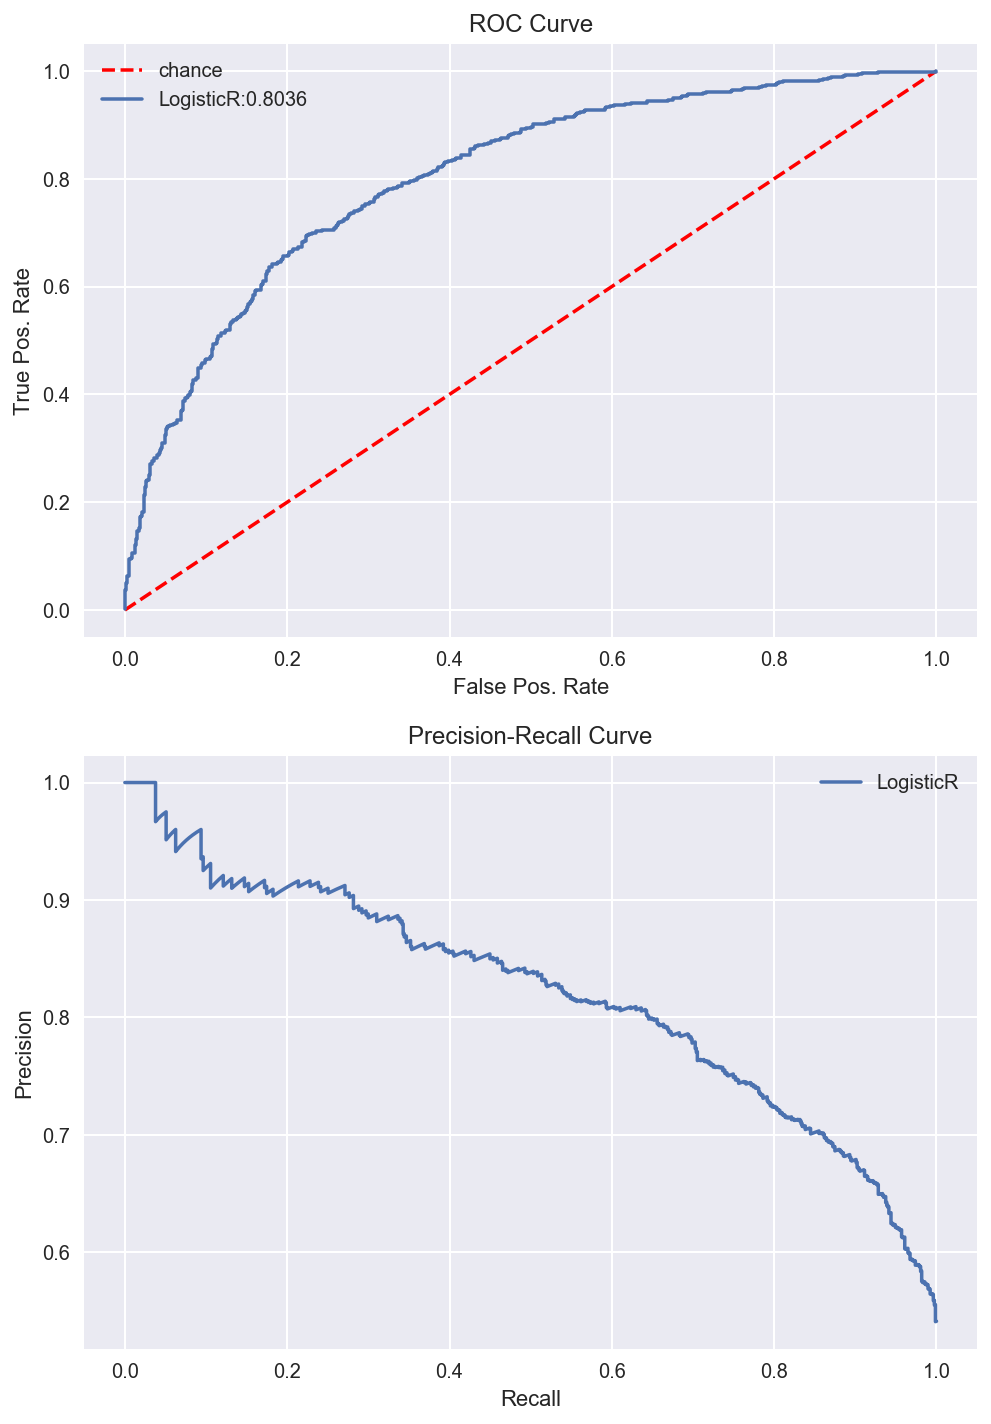

In [56]:
### SET TARGET COLUMN###
target = 'nerd_champion'

### SET PREDICTOR VARIABLES ###
chosen_predictors = npas_columns

### SELECT MODELS ###
model_dict = {
    'logistic': LogisticRegression(),
    'dtree': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(n_estimators=100),
    'gbm': GradientBoostingClassifier(),
    'knn': KNeighborsClassifier(),
    'svc': SVC(class_weight="balanced",probability=True)
}

svc_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-1,1e-2,1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},{'kernel':['poly'],'degree':[1,2,3]}]

gbm_parameters = {'model__subsample':np.arange(.1,1,.2),
              'model__max_depth':[5,6],
              #'model__learning_rate':np.arange(.01,.1,.01),
              'model__n_estimators':[500]}

eval_model(transformed_df, target, chosen_predictors, model_dict['logistic'])#, gbm_parameters)

# Improved Models for ASD

In [36]:
from sklearn.utils import resample

def upsample(df, target_class):
    # Separate majority and minority classes
    df_majority = df[df[target_class]==0]
    df_minority = df[df[target_class]==1]

    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=len(df_majority),    # to match majority class
                                     random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    # Display new class counts
    df_upsampled.ASD.value_counts()
    
    return df_upsampled



SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
AUC: 0.791276316163


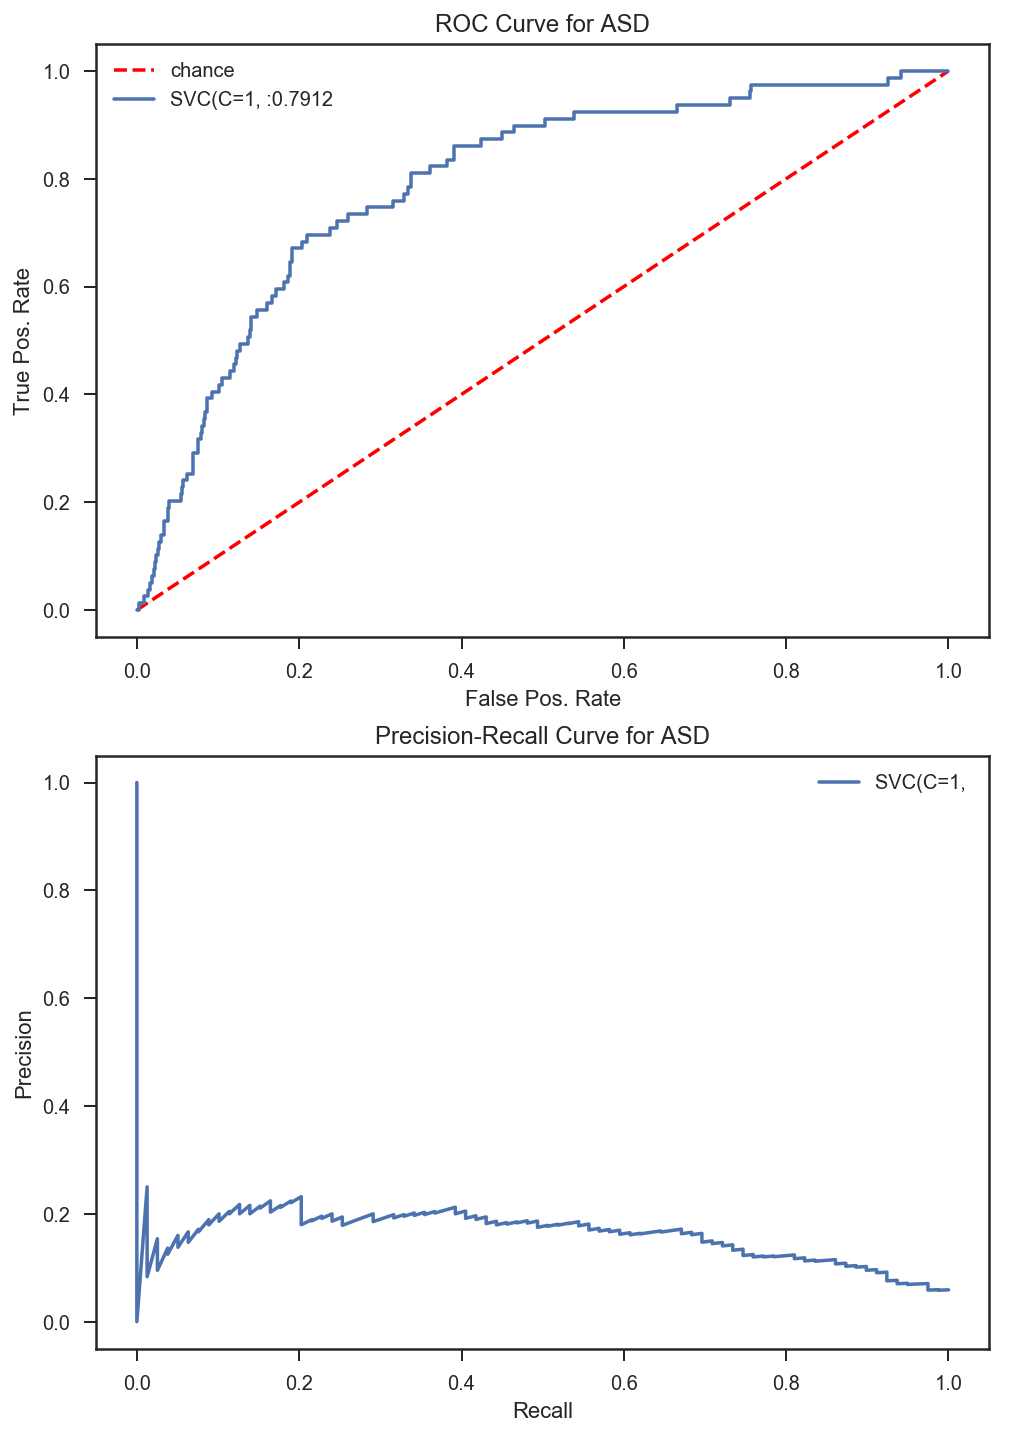

In [114]:
### SET TARGET COLUMN###
target = 'ASD'

### SET PREDICTOR VARIABLES ###
chosen_predictors = npas_columns + all_demographics + personality_columns
#chosen_predictors = all_demographics
#chosen_predictors = npas_columns

### SELECT MODELS ###
model_dict = {
    'logistic': LogisticRegression(),
    'rfc': RandomForestClassifier(n_estimators=100),
    'gbm': GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100),
    'knn': KNeighborsClassifier(),
    'svc': SVC(C=1, kernel='rbf', gamma=.01, class_weight="balanced",probability=True)
}

pipeline = eval_model(transformed_df, target, chosen_predictors, model_dict['svc'])#, gbm_parameter_grid)

In [195]:
target = 'ASD'
#Separates target from rest of data
y = transformed_df[target]
X = transformed_df.drop([target], axis=1)
X = X[all_demographics+npas_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fitted_gbm = GradientBoostingClassifier().fit(X_train, y_train)
#fitted_log = LogisticRegression().fit(X_train, y_train)

mxr = mli.ModelXRay(fitted_gbm,X_test)

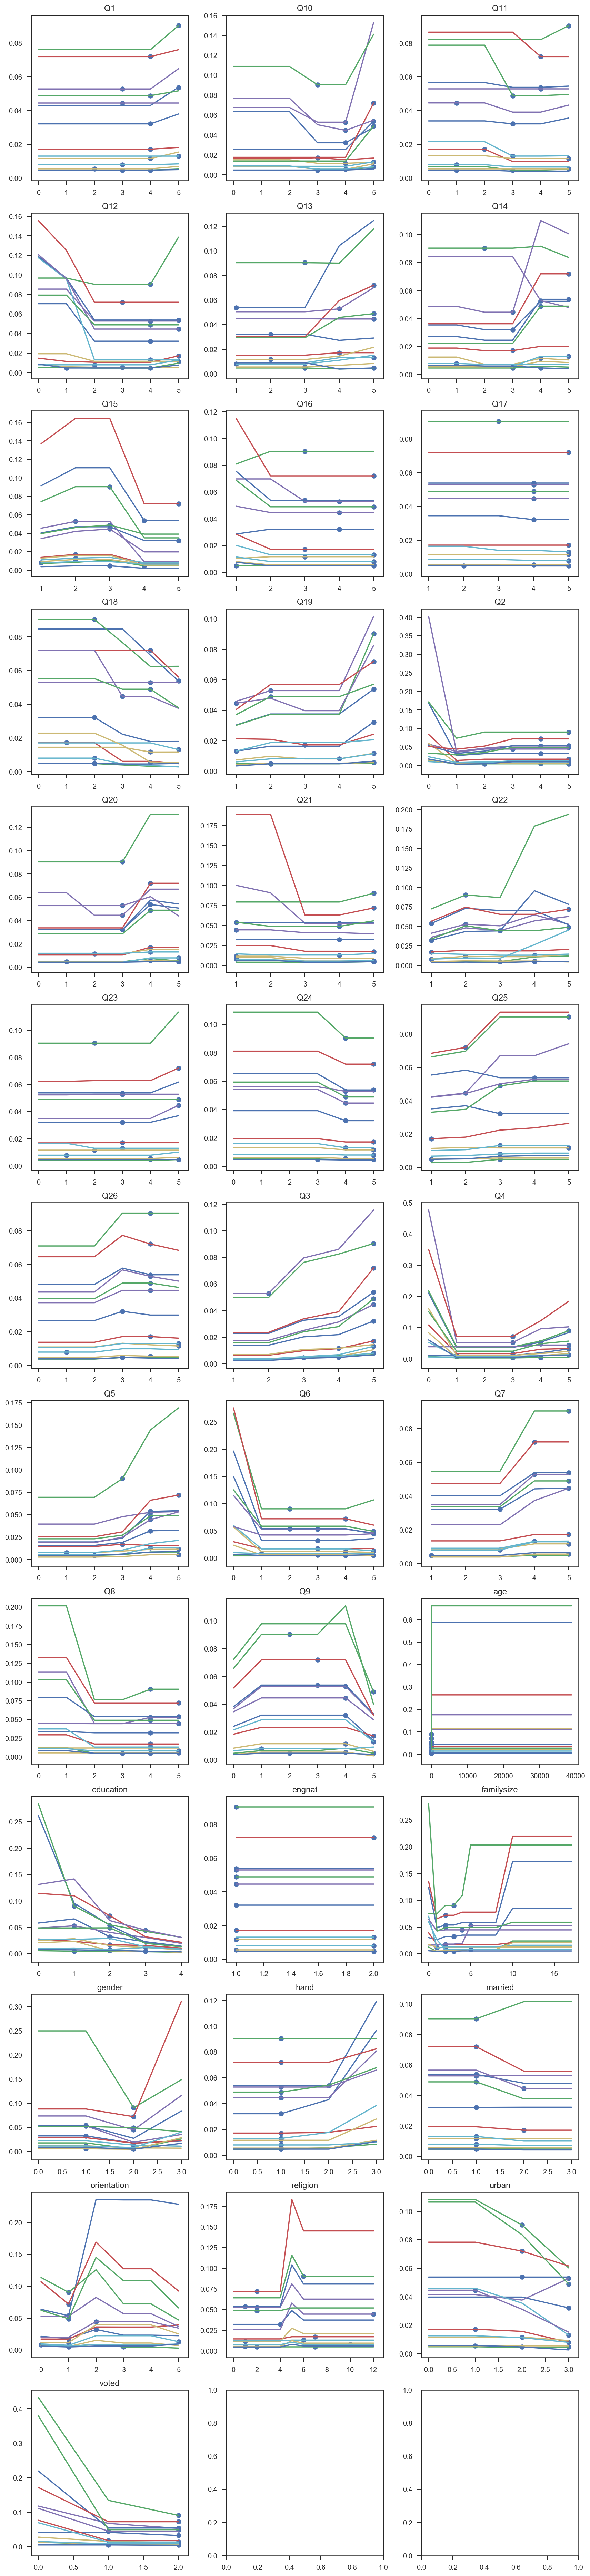

In [198]:
indices = mxr.feature_dependence_plots(num_pts=14)

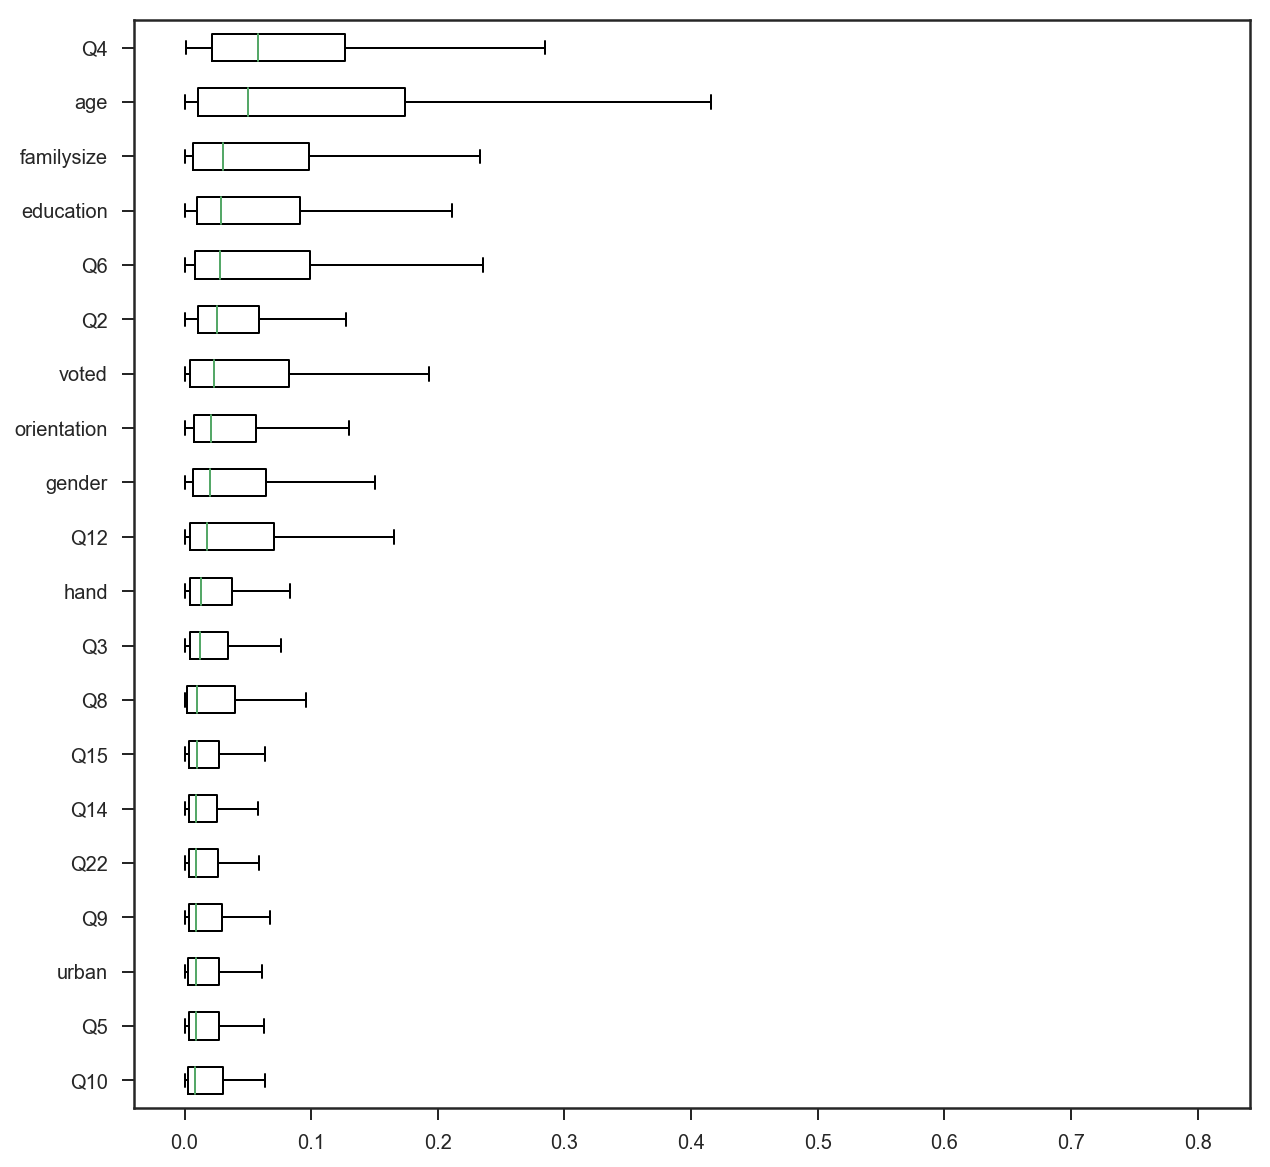

In [199]:
mxr.feature_effect_summary()